In [2]:
import pandas as pd
import numpy as np
import fyp_functions as fyp
import matplotlib.pyplot as plt
import itertools
pd.options.display.float_format = "{:,.3f}".format

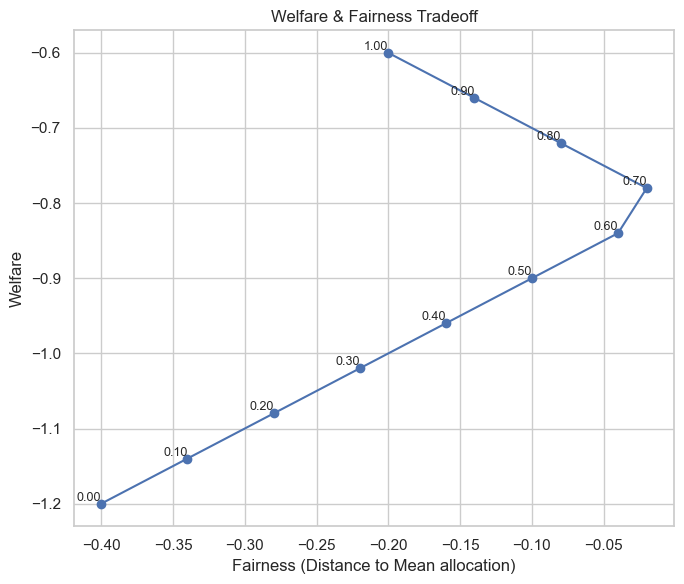

,alpha,Allocation,Welfare,Fairness
0,0.000,"[0.3, 0.7]",-1.200,-0.400
1,0.100,"[0.27, 0.73]",-1.140,-0.340
2,0.200,"[0.24, 0.76]",-1.080,-0.280
3,0.300,"[0.21, 0.79]",-1.020,-0.220
4,0.400,"[0.18, 0.8200000000000001]",-0.960,-0.160
5,0.500,"[0.15, 0.85]",-0.900,-0.100
6,0.600,"[0.11999999999999997, 0.88]",-0.840,-0.040
7,0.700,"[0.08999999999999998, 0.91]",-0.780,-0.020
8,0.800,"[0.059999999999999984, 0.94]",-0.720,-0.080
9,0.900,"[0.029999999999999992, 0.97]",-0.660,-0.140


In [3]:
P = fyp.generate_random_preferences(3,2,2)
P=np.array(	[[0.0, 1.0], [0.0, 1.0], [0.3, 0.7]]		)
fyp.plot_tradeoff_with_alpha(P,11,True)

In [4]:
IMM = fyp.mass_calculate_fairness(n=3, m=2, mechanism='IMM', 
                                          metrics=['mean'])
WMPM = fyp.mass_calculate_fairness(n=3, m=2, mechanism='WMPM', 
                                          metrics=['mean'])

df = pd.merge(IMM, WMPM, left_index=True, right_index=True, suffixes=('_IMM', '_WMPM'))
df.drop(columns=['profile_WMPM'],inplace=True)
df.rename(columns={'mean_IMM':'dist_mean_IMM','mean_WMPM':'dist_mean_WMPM','profile_IMM':'profile'},inplace=True)
df['mean_vote'] = df['profile'].apply(lambda x: np.round(np.mean(x, axis=0),3))
df['dist_mean_IMM'] = df['dist_mean_IMM'].apply(lambda x: np.round(x,3))
df['dist_mean_WMPM'] = df['dist_mean_WMPM'].apply(lambda x: np.round(x,3))
df

,profile,allocation_IMM,dist_mean_IMM,allocation_WMPM,dist_mean_WMPM,mean_vote
0,"[[0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]","[0.0, 1.0]",0.000,"[0.0, 1.0]",0.000,"[0.0, 1.0]"
1,"[[0.0, 1.0], [0.0, 1.0], [0.1, 0.9]]","[0.1, 0.9]",0.133,"[0.0, 1.0]",0.067,"[0.033, 0.967]"
2,"[[0.0, 1.0], [0.0, 1.0], [0.2, 0.8]]","[0.2, 0.8]",0.267,"[0.0, 1.0]",0.133,"[0.067, 0.933]"
3,"[[0.0, 1.0], [0.0, 1.0], [0.3, 0.7]]","[0.3, 0.7]",0.400,"[0.0, 1.0]",0.200,"[0.1, 0.9]"
4,"[[0.0, 1.0], [0.0, 1.0], [0.4, 0.6]]","[0.333, 0.667]",0.400,"[0.0, 1.0]",0.267,"[0.133, 0.867]"
...,...,...,...,...,...,...
1326,"[[1.0, 0.0], [1.0, 0.0], [0.6, 0.4]]","[0.667, 0.333]",0.400,"[1.0, 0.0]",0.267,"[0.867, 0.133]"
1327,"[[1.0, 0.0], [1.0, 0.0], [0.7, 0.3]]","[0.7, 0.3]",0.400,"[1.0, 0.0]",0.200,"[0.9, 0.1]"
1328,"[[1.0, 0.0], [1.0, 0.0], [0.8, 0.2]]","[0.8, 0.2]",0.267,"[1.0, 0.0]",0.133,"[0.933, 0.067]"
1329,"[[1.0, 0.0], [1.0, 0.0], [0.9, 0.1]]","[0.9, 0.1]",0.133,"[1.0, 0.0]",0.067,"[0.967, 0.033]"


if (what condition):
    this profile belongs to which figure 

max value as iterating over alphas

In [5]:
def get_min_max(P):
    
    df = fyp.iterate_over_alphas(P, 10, disutility_type='mean')

    return np.round((max(df['mean']) , min(df['mean'])),3)

df[['max_fairness', 'min_fairness']] = df['profile'].apply(
    lambda p: pd.Series(get_min_max(p))
)

In [6]:
def check_status(df,row):
    if df.loc[row,'dist_mean_IMM'] == df.loc[row,'dist_mean_WMPM']:
        return 'Equal'
    
    elif (df.loc[row,'dist_mean_IMM'] > df.loc[row,'dist_mean_WMPM']): 
        if (df.loc[row,'dist_mean_IMM'] == df.loc[row,'max_fairness']) & (df.loc[row,'dist_mean_WMPM'] == df.loc[row,'min_fairness']) :

            return 'No Tradeoff'
        elif (df.loc[row,'dist_mean_WMPM'] < df.loc[row,'max_fairness']):
            return 'Bend 2'    
    
    elif (df.loc[row,'dist_mean_IMM'] < df.loc[row,'dist_mean_WMPM']):
        if (df.loc[row,'dist_mean_IMM'] == df.loc[row,'min_fairness']):
            return 'Standard Tradeoff'
        
        elif (df.loc[row,'dist_mean_IMM'] > df.loc[row,'min_fairness']):
            return 'Bend 1'

        

for i in range(len(df)):
    df.loc[i,'status']= check_status(df,i)

In [7]:
df.head(15)

,profile,allocation_IMM,dist_mean_IMM,allocation_WMPM,dist_mean_WMPM,mean_vote,max_fairness,min_fairness,status
0,"[[0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]","[0.0, 1.0]",0.000,"[0.0, 1.0]",0.000,"[0.0, 1.0]",0.000,0.000,Equal
1,"[[0.0, 1.0], [0.0, 1.0], [0.1, 0.9]]","[0.1, 0.9]",0.133,"[0.0, 1.0]",0.067,"[0.033, 0.967]",0.133,0.000,Bend 2
2,"[[0.0, 1.0], [0.0, 1.0], [0.2, 0.8]]","[0.2, 0.8]",0.267,"[0.0, 1.0]",0.133,"[0.067, 0.933]",0.267,0.000,Bend 2
3,"[[0.0, 1.0], [0.0, 1.0], [0.3, 0.7]]","[0.3, 0.7]",0.400,"[0.0, 1.0]",0.200,"[0.1, 0.9]",0.400,0.000,Bend 2
4,"[[0.0, 1.0], [0.0, 1.0], [0.4, 0.6]]","[0.333, 0.667]",0.400,"[0.0, 1.0]",0.267,"[0.133, 0.867]",0.400,0.030,Bend 2
5,"[[0.0, 1.0], [0.0, 1.0], [0.5, 0.5]]","[0.333, 0.667]",0.333,"[0.0, 1.0]",0.333,"[0.167, 0.833]",0.333,0.037,Equal
6,"[[0.0, 1.0], [0.0, 1.0], [0.6, 0.4]]","[0.333, 0.667]",0.267,"[0.0, 1.0]",0.400,"[0.2, 0.8]",0.400,0.030,Bend 1
7,"[[0.0, 1.0], [0.0, 1.0], [0.7, 0.3]]","[0.333, 0.667]",0.200,"[0.0, 1.0]",0.467,"[0.233, 0.767]",0.467,0.022,Bend 1
8,"[[0.0, 1.0], [0.0, 1.0], [0.8, 0.2]]","[0.333, 0.667]",0.133,"[0.0, 1.0]",0.533,"[0.267, 0.733]",0.533,0.015,Bend 1
9,"[[0.0, 1.0], [0.0, 1.0], [0.9, 0.1]]","[0.333, 0.667]",0.067,"[0.0, 1.0]",0.600,"[0.3, 0.7]",0.600,0.007,Bend 1


In [8]:
bend1= df[df['status']=='Bend 1']

In [9]:
import plotly.express as px

# Extract x, y, z the same way:
df['x'] = df['profile'].apply(lambda p: p[0][0])  # x
df['y'] = df['profile'].apply(lambda p: p[1][0])  # y
df['z'] = df['profile'].apply(lambda p: p[2][0])  # z

# Plotly scatter 3D
fig = px.scatter_3d(
    df,
    x='x',
    y='y',
    z='z',
    color='status',  # color points by status
    title='3D Profile Scatter by Status'
)

fig.show()

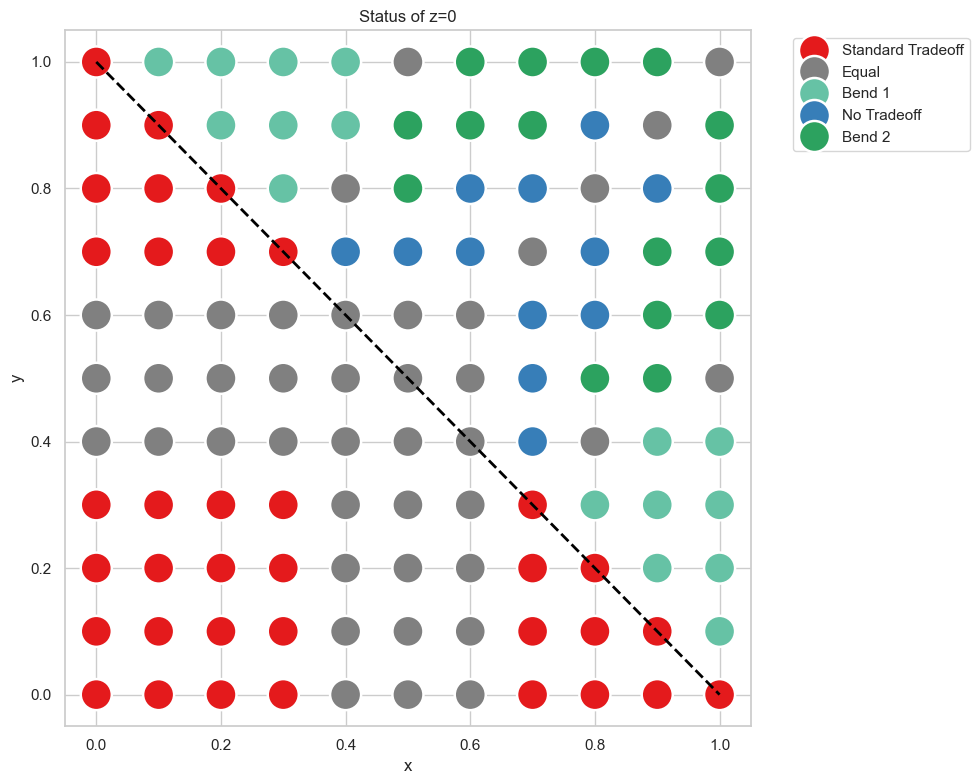

In [38]:
import seaborn as sns
sns.set_theme(style="whitegrid")

df_custom = df[df['z']==1]

custom_cl  = {
    "Bend 1":      "#66c2a5",  # Greenish
    "Bend 2":      "#2ca25f",  # A slightly darker/lighter green to distinguish from Bend 1
    "Equal":       "#808080",  # Gray
    "Standard Tradeoff": "#e41a1c",  # Strong red
    "No Tradeoff": "#377eb8"   # Strong blue
}

# Increase the figure size
plt.figure(figsize=(10, 8))

sns.scatterplot(
    data=df_custom,
    x='x', 
    y='y', 
    hue='status',
    palette=custom_cl,         # different marker shapes per status
    s=500,                   # marker size
)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Status of z=0')
plt.tight_layout()

x_vals = np.linspace(0, 1, 100)

valid_x = [x for x in x_vals if 0 <= 1 - x <= 1]
if valid_x:
    plt.plot(valid_x, [1 - x for x in valid_x], linestyle='--', color='black', linewidth=2)

# valid_x2 = [x for x in x_vals if 0 <= 1.7 - x <= 1]
# if valid_x2:
#     plt.plot(valid_x2, [1.7 - x for x in valid_x2], linestyle='--', color='black', linewidth=2)

# y_vals = np.clip(1 - x_vals, 0, 1)
# plt.plot(x_vals, y_vals, linestyle='--', color='black', linewidth=2, label=r'$y = 1 - x$')


plt.show()

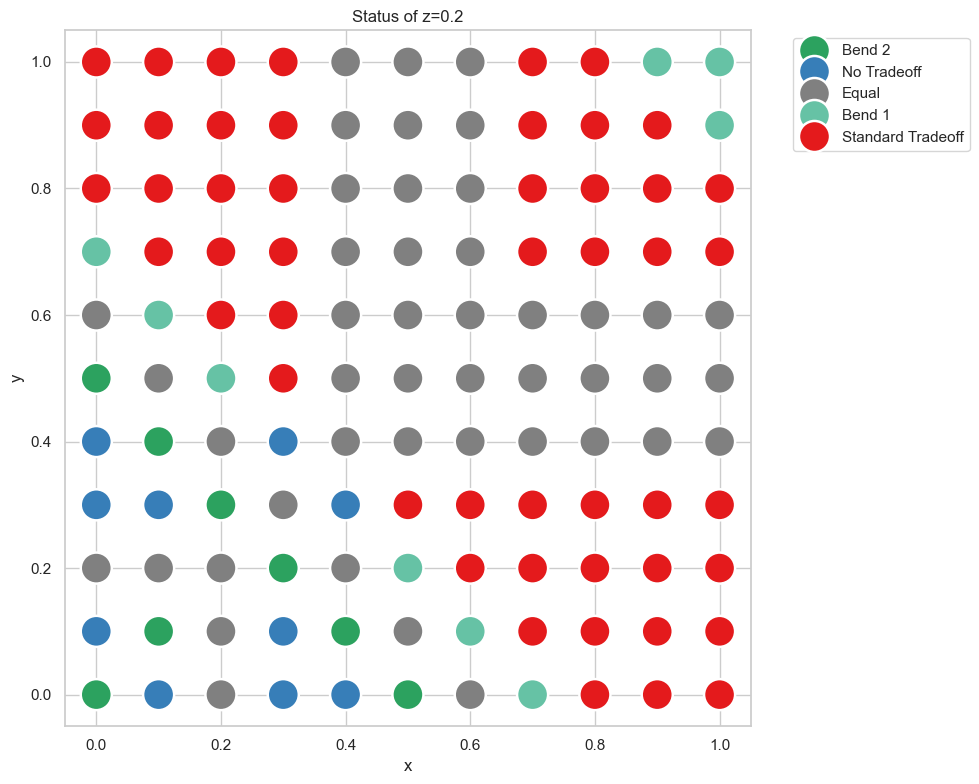

In [ ]:
sns.set_theme(style="whitegrid")

df_custom = df[df['z']==0]

custom_cl  = {
    "Bend 1":      "#66c2a5",  # Greenish
    "Bend 2":      "#2ca25f",  # A slightly darker/lighter green to distinguish from Bend 1
    "Equal":       "#808080",  # Gray
    "Standard Tradeoff": "#e41a1c",  # Strong red
    "No Tradeoff": "#377eb8"   # Strong blue
}

# Increase the figure size
plt.figure(figsize=(10, 8))

sns.scatterplot(
    data=df_custom,
    x='x', 
    y='y',
    hue='status',
    palette=custom_cl,         # different marker shapes per status
    s=500,                   # marker size
)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Status of z=0.2')
plt.tight_layout()
plt.show()